In [14]:
import pandas as pd
import numpy as np
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime
import math

%matplotlib inline
from scipy.stats import skew
import sys

In [3]:
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
train = train.drop(columns=['IsHoliday'],axis = 1)
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 12.9+ MB


In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [6]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [7]:
store_features = stores.merge(features,on = 'Store',how = 'inner')
store_data = train.merge(store_features,on = ['Store','Date'],how = 'right')

In [8]:
store_data.columns
dataset = store_data.drop(columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5','Unemployment'],axis = 1)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'],
      dtype='object')

In [9]:
dataset.corr()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,IsHoliday
Store,1.000000,0.024004,-0.085195,-0.183170,-0.050010,0.065511,-0.211049,-0.000539
Dept,0.024004,1.000000,0.148032,-0.002966,0.004437,0.003572,-0.007477,0.000916
Weekly_Sales,-0.085195,0.148032,1.000000,0.243828,-0.002312,-0.000120,-0.020921,0.012774
Size,-0.183170,-0.002966,0.243828,1.000000,-0.058354,0.003284,-0.003380,0.000579
Temperature,-0.050010,0.004437,-0.002312,-0.058354,1.000000,0.142966,0.181789,-0.156080
Fuel_Price,0.065511,0.003572,-0.000120,0.003284,0.142966,1.000000,-0.164460,-0.078261
CPI,-0.211049,-0.007477,-0.020921,-0.003380,0.181789,-0.164460,1.000000,-0.001869
IsHoliday,-0.000539,0.000916,0.012774,0.000579,-0.156080,-0.078261,-0.001869,1.000000


In [17]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,IsHoliday
0,1,1.0,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,False
1,1,2.0,2010-02-05,50605.27,A,151315,42.31,2.572,211.096358,False
2,1,3.0,2010-02-05,13740.12,A,151315,42.31,2.572,211.096358,False
3,1,4.0,2010-02-05,39954.04,A,151315,42.31,2.572,211.096358,False
4,1,5.0,2010-02-05,32229.38,A,151315,42.31,2.572,211.096358,False


In [18]:
train.head()

,Store,Dept,Date,Weekly_Sales
0,1,1,2010-02-05,24924.50
1,1,1,2010-02-12,46039.49
2,1,1,2010-02-19,41595.55
3,1,1,2010-02-26,19403.54
4,1,1,2010-03-05,21827.90


In [4]:
data = train.merge(features, on=['Store', 'Date'], how='inner').merge(stores, on=['Store'], how='inner')
print(data.shape)

(421570, 17)


([<matplotlib.patches.Wedge at 0x1ba06759e88>,
 [Text(0.5335036046651801, 1.4594151908712094, 'A store'),
  Text(0.07916348006504959, -0.36284217762522486, 'B store'),
  Text(1.377003502852988, 0.10953251609949749, 'C store')],
 [Text(0.51675180233259, 0.9797075954356047, '48.9%'),
  Text(0.2895817400325248, 0.06857891118738757, '37.8%'),
  Text(0.938501751426494, 0.3047662580497488, '13.3%')])

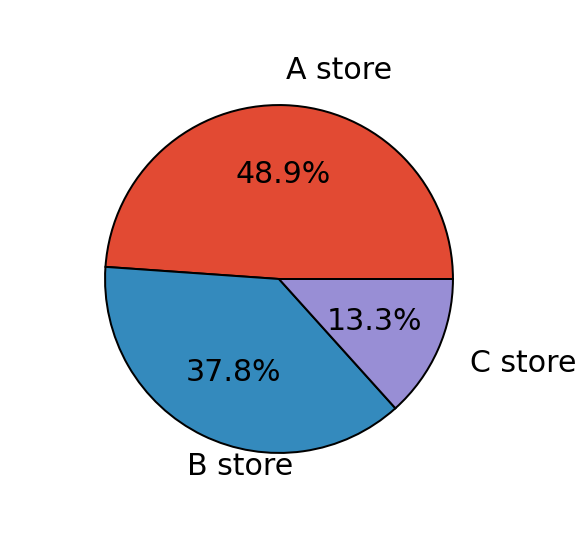

In [5]:
sorted_type = stores.groupby('Type')
plt.style.use('ggplot')
labels=['A store','B store','C store']
sizes=sorted_type.describe()['Size'].round(1)
sizes=[(22/(17+6+22))*100,(17/(17+6+22))*100,(6/(17+6+22))*100] # convert to the proportion
fig, axes = plt.subplots(1,1, figsize=(10,10))
wprops={'edgecolor':'black',
      'linewidth':2}
tprops = {'fontsize':30}
axes.pie(sizes,
        labels=labels,
        explode=(0.0,0,0),
        autopct='%1.1f%%',
        pctdistance=0.6,
        labeldistance=1.2,
        wedgeprops=wprops,
        textprops=tprops,
        radius=0.8,
        center=(0.5,0.5))
plt.show()

In [6]:
data=data.fillna(0)
data.isna().sum()
data.describe()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
dtype: int64

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [7]:
data = data[data['Weekly_Sales'] >= 0]

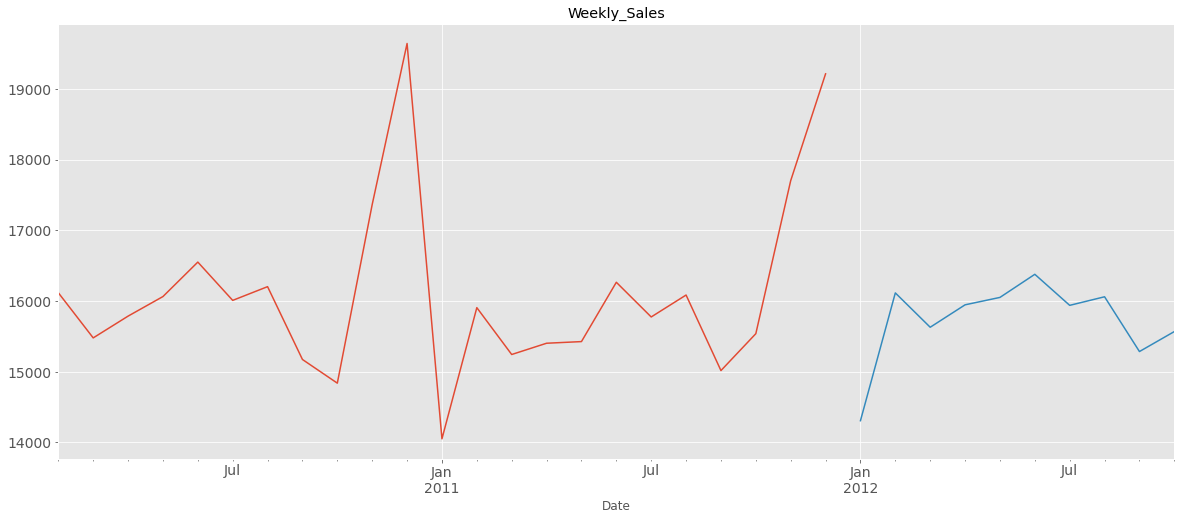

In [8]:
data.Date = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.index = data.Date
data = data.drop('Date', axis=1)
data = data.resample('MS').mean() # Resmapling the time series data with month starting first.
# Train-Test splitting of time series data
train_data = data[:int(0.7*(len(data)))]
test_data = data[int(0.7*(len(data))):]
# ARIMA takes univariate data.
train_data = train_data['Weekly_Sales']
test_data = test_data['Weekly_Sales']
# Plot of Weekly_Sales with respect to years in train and test.
train_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Weekly_Sales'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -4.173916935101503
p-value: 0.0007291844915317363
Critical Values:
	1%: -3.769732625845229
	5%: -3.005425537190083
	10%: -2.6425009917355373


In [10]:
# Applying auto_arima model on train data.
from pmdarima.arima import auto_arima
model_auto_arima = auto_arima(train_data, trace=True, error_action='ignore', suppress_warnings=True)
model_auto_arima = auto_arima(train_data, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0, max_p=10, max_q=10, max_P=10, max_Q=10, seasonal=True,stepwise=False, suppress_warnings=True, D=1, max_D=10,error_action='ignore',approximation = False)
model_auto_arima.fit(train_data)

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=405.580, BIC=412.393, Fit time=0.119 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=398.029, BIC=400.300, Fit time=0.004 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=399.847, BIC=403.254, Fit time=0.011 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=399.604, BIC=403.011, Fit time=0.027 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=401.739, BIC=406.281, Fit time=0.014 seconds
Total fit time: 0.185 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=398.029, BIC=400.300, Fit time=0.004 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=399.604, BIC=403.011, Fit time=0.024 seconds
Fit ARIMA: order=(0, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=397.039, BIC=401.581, Fit time=0.093 seconds
Fit ARIMA: order=(0, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=397.780, BIC=403.457, Fit time=0.098 seconds
Fit ARIMA: order=(0, 0, 4

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 0, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Prediction of Weekly Sales using Auto ARIMA model')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Weekly Sales')

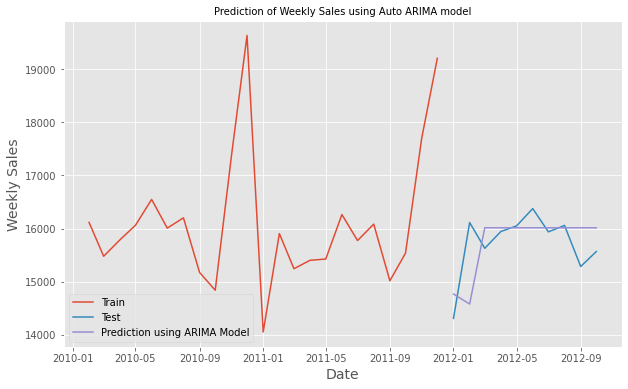

In [16]:
# Predicting the test values using predict function.
forecast = model_auto_arima.predict(n_periods=len(test_data))
forecast = pd.DataFrame(forecast,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(10,6))
plt.title('Prediction of Weekly Sales using Auto ARIMA model', fontsize=10)
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(forecast, label='Prediction using ARIMA Model')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [17]:
# Performance metric for ARIMA model -MSE/RMSE
print('Mean Squared Error (MSE) of ARIMA: ', mean_squared_error(test_data, forecast))
print('Root Mean Squared Error (RMSE) of ARIMA: ', math.sqrt(mean_squared_error(test_data, forecast)))
print('Mean Absolute Deviation (MAD) of ARIMA: ', mean_absolute_error(test_data, forecast))

Mean Squared Error (MSE) of ARIMA:  360462.3015824534
Root Mean Squared Error (RMSE) of ARIMA:  600.3851277159132
Mean Absolute Deviation (MAD) of ARIMA:  415.0741239933817
